# BOOTSTRAP SMOTE DALAM KLASIFIKASI IMBALANCE DATA MENGGUNAKAN k-NEAREST NEIGHBOR DAN SUPPORT VECTOR MACHINE

-Muhammad Syidiq Abdjanur-
##### *Skripsi-Untuk memenuhi sebagai persyaratan Mencapai strata satu (S1)*


Data yang digunakan untuk simulasi merupakan data yang diambil di www.kaggle.com pada 23 Februari 2019, merupakan data perusahaan Home Credit. Data terkait dengan pelanggan Home Credit yang mengklasifikasi orang layak atau tidaknya orang mengambil kredit.

Link Data: https://www.kaggle.com/c/home-credit-default-risk

### Program pemilihan data
Seleksi adalah proses menghilangkan variabel yang bersifat identitas (nama, alamat, dll), dan profelling data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plot
from sklearn.decomposition import PCA


data_A = pd.read_csv("application_train.csv")
we = []
for w in range(0,10000):
    we.append(w)
data = data_A.iloc[we].copy()
data.info(verbose=True, null_counts=True)
pca = PCA(n_components=2)
X = data.drop(['SK_ID_CURR','TARGET'],axis=1)
y = data['TARGET']
X = pca.fit_transform(X)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 122 columns):
SK_ID_CURR                      10000 non-null int64
TARGET                          10000 non-null int64
NAME_CONTRACT_TYPE              10000 non-null object
CODE_GENDER                     10000 non-null object
FLAG_OWN_CAR                    10000 non-null object
FLAG_OWN_REALTY                 10000 non-null object
CNT_CHILDREN                    10000 non-null int64
AMT_INCOME_TOTAL                10000 non-null float64
AMT_CREDIT                      10000 non-null float64
AMT_ANNUITY                     10000 non-null float64
AMT_GOODS_PRICE                 9993 non-null float64
NAME_TYPE_SUITE                 9959 non-null object
NAME_INCOME_TYPE                10000 non-null object
NAME_EDUCATION_TYPE             10000 non-null object
NAME_FAMILY_STATUS              10000 non-null object
NAME_HOUSING_TYPE               10000 non-null object
REGION_POPULATION_RELATIVE      10000 non-null float64
DAYS_BIRTH                      10000 non-null int64
DAYS_EMPLOYED                   10000 non-null int64
DAYS_REGISTRATION               10000 non-null float64
DAYS_ID_PUBLISH                 10000 non-null int64
OWN_CAR_AGE                     3338 non-null float64
FLAG_MOBIL                      10000 non-null int64
FLAG_EMP_PHONE                  10000 non-null int64
FLAG_WORK_PHONE                 10000 non-null int64
FLAG_CONT_MOBILE                10000 non-null int64
FLAG_PHONE                      10000 non-null int64
FLAG_EMAIL                      10000 non-null int64
OCCUPATION_TYPE                 6911 non-null object
CNT_FAM_MEMBERS                 10000 non-null float64
REGION_RATING_CLIENT            10000 non-null int64
REGION_RATING_CLIENT_W_CITY     10000 non-null int64
WEEKDAY_APPR_PROCESS_START      10000 non-null object
HOUR_APPR_PROCESS_START         10000 non-null int64
REG_REGION_NOT_LIVE_REGION      10000 non-null int64
REG_REGION_NOT_WORK_REGION      10000 non-null int64
LIVE_REGION_NOT_WORK_REGION     10000 non-null int64
REG_CITY_NOT_LIVE_CITY          10000 non-null int64
REG_CITY_NOT_WORK_CITY          10000 non-null int64
LIVE_CITY_NOT_WORK_CITY         10000 non-null int64
ORGANIZATION_TYPE               10000 non-null object
EXT_SOURCE_1                    4353 non-null float64
EXT_SOURCE_2                    9974 non-null float64
EXT_SOURCE_3                    8005 non-null float64
APARTMENTS_AVG                  4935 non-null float64
BASEMENTAREA_AVG                4184 non-null float64
YEARS_BEGINEXPLUATATION_AVG     5120 non-null float64
YEARS_BUILD_AVG                 3360 non-null float64
COMMONAREA_AVG                  3021 non-null float64
ELEVATORS_AVG                   4691 non-null float64
ENTRANCES_AVG                   4994 non-null float64
FLOORSMAX_AVG                   5057 non-null float64
FLOORSMIN_AVG                   3205 non-null float64
LANDAREA_AVG                    4102 non-null float64
LIVINGAPARTMENTS_AVG            3155 non-null float64
LIVINGAREA_AVG                  4991 non-null float64
NONLIVINGAPARTMENTS_AVG         3058 non-null float64
NONLIVINGAREA_AVG               4522 non-null float64
APARTMENTS_MODE                 4935 non-null float64
BASEMENTAREA_MODE               4184 non-null float64
YEARS_BEGINEXPLUATATION_MODE    5120 non-null float64
YEARS_BUILD_MODE                3360 non-null float64
COMMONAREA_MODE                 3021 non-null float64
ELEVATORS_MODE                  4691 non-null float64
ENTRANCES_MODE                  4994 non-null float64
FLOORSMAX_MODE                  5057 non-null float64
FLOORSMIN_MODE                  3205 non-null float64
LANDAREA_MODE                   4102 non-null float64
LIVINGAPARTMENTS_MODE           3155 non-null float64
LIVINGAREA_MODE                 4991 non-null float64
NONLIVINGAPARTMENTS_MODE        3058 non-null float64
NONLIVINGAREA_MODE              4522 non-null float64
APARTMENTS_MEDI                 4935 non-null float64
BASEMENTAREA_MEDI               4184 non-null float64
YEARS_BEGINEXPLUATATION_MEDI    5120 non-null float64
YEARS_BUILD_MEDI                3360 non-null float64
COMMONAREA_MEDI                 3021 non-null float64
ELEVATORS_MEDI                  4691 non-null float64
ENTRANCES_MEDI                  4994 non-null float64
FLOORSMAX_MEDI                  5057 non-null float64
FLOORSMIN_MEDI                  3205 non-null float64
LANDAREA_MEDI                   4102 non-null float64
LIVINGAPARTMENTS_MEDI           3155 non-null float64
LIVINGAREA_MEDI                 4991 non-null float64
NONLIVINGAPARTMENTS_MEDI        3058 non-null float64
NONLIVINGAREA_MEDI              4522 non-null float64
FONDKAPREMONT_MODE              3143 non-null object
HOUSETYPE_MODE                  4995 non-null object
TOTALAREA_MODE                  5187 non-null float64
WALLSMATERIAL_MODE              4911 non-null object
EMERGENCYSTATE_MODE             5275 non-null object
OBS_30_CNT_SOCIAL_CIRCLE        9958 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE        9958 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE        9958 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE        9958 non-null float64
DAYS_LAST_PHONE_CHANGE          10000 non-null float64
FLAG_DOCUMENT_2                 10000 non-null int64
FLAG_DOCUMENT_3                 10000 non-null int64
FLAG_DOCUMENT_4                 10000 non-null int64
FLAG_DOCUMENT_5                 10000 non-null int64
FLAG_DOCUMENT_6                 10000 non-null int64
FLAG_DOCUMENT_7                 10000 non-null int64
FLAG_DOCUMENT_8                 10000 non-null int64
FLAG_DOCUMENT_9                 10000 non-null int64
FLAG_DOCUMENT_10                10000 non-null int64
FLAG_DOCUMENT_11                10000 non-null int64
FLAG_DOCUMENT_12                10000 non-null int64
FLAG_DOCUMENT_13                10000 non-null int64
FLAG_DOCUMENT_14                10000 non-null int64
FLAG_DOCUMENT_15                10000 non-null int64
FLAG_DOCUMENT_16                10000 non-null int64
FLAG_DOCUMENT_17                10000 non-null int64
FLAG_DOCUMENT_18                10000 non-null int64
FLAG_DOCUMENT_19                10000 non-null int64
FLAG_DOCUMENT_20                10000 non-null int64
FLAG_DOCUMENT_21                10000 non-null int64
AMT_REQ_CREDIT_BUREAU_HOUR      8634 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       8634 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      8634 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       8634 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       8634 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      8634 non-null float64
dtypes: float64(65), int64(41), object(16)
memory usage: 8.8+ MB

```
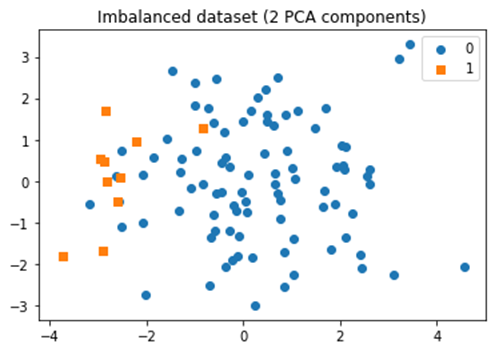

proses ini dilakukan pemeriksaan setiap variabel apakah ada mising value. Jika variabel terdapat mising value maka variabel tersebut ditangani menggunakan klasifikasi k-NN, menunjukkan banyaknya non-null (data tidak kosong) pada variabel yang dimana masih ada variabel-variabel yang memiliki jumlah non-null kurang dari jumlah data yaitu 10000, yang menandakan bahwa masih ada nilai null atau biasa disebut mising value.

### Program proses data
Proses ini melakukan pemeriksaan setiap variabel apakah memiliki mising value (data hilang), jika variabel memiliki mising value maka variabel dilakukan klasifikasi menggukana k-NN, untuk menentukan isi mising value agar dapat dilanjutkan keproses selanjutnya. Selanjutnya setiap variabel yang memiliki value string dikategorikan menjadi numberik. Selanjutnya pisahkan untuk data test dan data train.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plot

data_A = pd.read_csv("application_train.csv")
we = []
for w in range(0,10000):
    we.append(w)
data = data_A.iloc[we].copy()

n = len(data)
nc = data.columns.values
n_nan = data.isna().sum()
c_asl = []
c_nan = []

for l in range(0,len(nc)):
    if n_nan[nc[l]] == 0:
        c_asl.append(nc[l])
    else:
        c_nan.append(nc[l])

LE=LabelEncoder()
for m in range(0,len(c_asl)):
    if type(data[c_asl[m]].values[0]) == str:
        data[c_asl[m]]=LE.fit_transform(data[c_asl[m]])

for i in range(0,len(c_nan)):
    in_ram = []
    in_mod = []
    tf = data[c_nan[i]].isna()
    for j in range(0,n):
        if tf.iloc[j] == True:
            in_ram.append(j)
        else:
            in_mod.append(j)

    if type(data[c_nan[i]].values[0]) == str:
        qq = LE.fit_transform(data.iloc[in_mod][c_nan[i]])
        qa = data[c_nan[i]].copy()
        for qi in range(0,len(qq)):
            qa.iloc[in_mod[qi]] = qq[qi]
        data[c_nan[i]] = qa
        x_mod = data[c_asl].iloc[in_mod]
        y_mod = pd.DataFrame(qq)
    else:
        x_mod = data[c_asl].iloc[in_mod]
        y_mod = data[c_nan[i]].iloc[in_mod]



    if type(y_mod.values[0]) == np.float64 or type(y_mod.values[0]) == np.float32:
        cls = LR()
        cls.fit(x_mod, y_mod)
        aa = data[c_nan[i]].copy()
        for k in range(0,len(in_ram)):
            aa.iloc[in_ram[k]]=np.float64(cls.predict(data[c_asl].iloc[[in_ram[k]]])[0])
        data[c_nan[i]] = aa
    elif type(y_mod.values[0]) == np.int64 or type(y_mod.values[0]) == np.int32 or type(y_mod.values[0]) == np.ndarray:
        nn = int(len(x_mod)*0.2)
        cls = KNN(n_neighbors=nn)
        cls.fit(x_mod, y_mod)
        aa = data[c_nan[i]].copy()
        for k in range(0,len(in_ram)):
            aa.iloc[in_ram[k]]=np.int64(cls.predict(data[c_asl].iloc[[in_ram[k]]])[0])
        data[c_nan[i]] = aa
    print(c_nan[i])
data.info(verbose=True, null_counts=True)
t_c = data.TARGET.value_counts()
t_c.plot(kind='bar',title='Sebaran Label')
plot.show()
print('Class 0:', t_c[0])
print('Class 1:', t_c[1])
print('Proportion:', round(t_c[0] / t_c[1], 2), ': 1')
print(t_c)

```
SK_ID_CURR                      10000 non-null int64
TARGET                          10000 non-null int64
NAME_CONTRACT_TYPE              10000 non-null int32
CODE_GENDER                     10000 non-null int32
FLAG_OWN_CAR                    10000 non-null int32
FLAG_OWN_REALTY                 10000 non-null int32
CNT_CHILDREN                    10000 non-null int64
AMT_INCOME_TOTAL                10000 non-null float64
AMT_CREDIT                      10000 non-null float64
AMT_ANNUITY                     10000 non-null float64
AMT_GOODS_PRICE                 10000 non-null float64
NAME_TYPE_SUITE                 10000 non-null int64
NAME_INCOME_TYPE                10000 non-null int32
NAME_EDUCATION_TYPE             10000 non-null int32
NAME_FAMILY_STATUS              10000 non-null int32
NAME_HOUSING_TYPE               10000 non-null int32
REGION_POPULATION_RELATIVE      10000 non-null float64
DAYS_BIRTH                      10000 non-null int64
DAYS_EMPLOYED                   10000 non-null int64
DAYS_REGISTRATION               10000 non-null float64
DAYS_ID_PUBLISH                 10000 non-null int64
OWN_CAR_AGE                     10000 non-null float64
FLAG_MOBIL                      10000 non-null int64
FLAG_EMP_PHONE                  10000 non-null int64
FLAG_WORK_PHONE                 10000 non-null int64
FLAG_CONT_MOBILE                10000 non-null int64
FLAG_PHONE                      10000 non-null int64
FLAG_EMAIL                      10000 non-null int64
OCCUPATION_TYPE                 10000 non-null int64
CNT_FAM_MEMBERS                 10000 non-null float64
REGION_RATING_CLIENT            10000 non-null int64
REGION_RATING_CLIENT_W_CITY     10000 non-null int64
WEEKDAY_APPR_PROCESS_START      10000 non-null int32
HOUR_APPR_PROCESS_START         10000 non-null int64
REG_REGION_NOT_LIVE_REGION      10000 non-null int64
REG_REGION_NOT_WORK_REGION      10000 non-null int64
LIVE_REGION_NOT_WORK_REGION     10000 non-null int64
REG_CITY_NOT_LIVE_CITY          10000 non-null int64
REG_CITY_NOT_WORK_CITY          10000 non-null int64
LIVE_CITY_NOT_WORK_CITY         10000 non-null int64
ORGANIZATION_TYPE               10000 non-null int32
EXT_SOURCE_1                    10000 non-null float64
EXT_SOURCE_2                    10000 non-null float64
EXT_SOURCE_3                    10000 non-null float64
APARTMENTS_AVG                  10000 non-null float64
BASEMENTAREA_AVG                10000 non-null float64
YEARS_BEGINEXPLUATATION_AVG     10000 non-null float64
YEARS_BUILD_AVG                 10000 non-null float64
COMMONAREA_AVG                  10000 non-null float64
ELEVATORS_AVG                   10000 non-null float64
ENTRANCES_AVG                   10000 non-null float64
FLOORSMAX_AVG                   10000 non-null float64
FLOORSMIN_AVG                   10000 non-null float64
LANDAREA_AVG                    10000 non-null float64
LIVINGAPARTMENTS_AVG            10000 non-null float64
LIVINGAREA_AVG                  10000 non-null float64
NONLIVINGAPARTMENTS_AVG         10000 non-null float64
NONLIVINGAREA_AVG               10000 non-null float64
APARTMENTS_MODE                 10000 non-null float64
BASEMENTAREA_MODE               10000 non-null float64
YEARS_BEGINEXPLUATATION_MODE    10000 non-null float64
YEARS_BUILD_MODE                10000 non-null float64
COMMONAREA_MODE                 10000 non-null float64
ELEVATORS_MODE                  10000 non-null float64
ENTRANCES_MODE                  10000 non-null float64
FLOORSMAX_MODE                  10000 non-null float64
FLOORSMIN_MODE                  10000 non-null float64
LANDAREA_MODE                   10000 non-null float64
LIVINGAPARTMENTS_MODE           10000 non-null float64
LIVINGAREA_MODE                 10000 non-null float64
NONLIVINGAPARTMENTS_MODE        10000 non-null float64
NONLIVINGAREA_MODE              10000 non-null float64
APARTMENTS_MEDI                 10000 non-null float64
BASEMENTAREA_MEDI               10000 non-null float64
YEARS_BEGINEXPLUATATION_MEDI    10000 non-null float64
YEARS_BUILD_MEDI                10000 non-null float64
COMMONAREA_MEDI                 10000 non-null float64
ELEVATORS_MEDI                  10000 non-null float64
ENTRANCES_MEDI                  10000 non-null float64
FLOORSMAX_MEDI                  10000 non-null float64
FLOORSMIN_MEDI                  10000 non-null float64
LANDAREA_MEDI                   10000 non-null float64
LIVINGAPARTMENTS_MEDI           10000 non-null float64
LIVINGAREA_MEDI                 10000 non-null float64
NONLIVINGAPARTMENTS_MEDI        10000 non-null float64
NONLIVINGAREA_MEDI              10000 non-null float64
FONDKAPREMONT_MODE              10000 non-null int64
HOUSETYPE_MODE                  10000 non-null int64
TOTALAREA_MODE                  10000 non-null float64
WALLSMATERIAL_MODE              10000 non-null int64
EMERGENCYSTATE_MODE             10000 non-null int64
OBS_30_CNT_SOCIAL_CIRCLE        10000 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE        10000 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE        10000 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE        10000 non-null float64
DAYS_LAST_PHONE_CHANGE          10000 non-null float64
FLAG_DOCUMENT_2                 10000 non-null int64
FLAG_DOCUMENT_3                 10000 non-null int64
FLAG_DOCUMENT_4                 10000 non-null int64
FLAG_DOCUMENT_5                 10000 non-null int64
FLAG_DOCUMENT_6                 10000 non-null int64
FLAG_DOCUMENT_7                 10000 non-null int64
FLAG_DOCUMENT_8                 10000 non-null int64
FLAG_DOCUMENT_9                 10000 non-null int64
FLAG_DOCUMENT_10                10000 non-null int64
FLAG_DOCUMENT_11                10000 non-null int64
FLAG_DOCUMENT_12                10000 non-null int64
FLAG_DOCUMENT_13                10000 non-null int64
FLAG_DOCUMENT_14                10000 non-null int64
FLAG_DOCUMENT_15                10000 non-null int64
FLAG_DOCUMENT_16                10000 non-null int64
FLAG_DOCUMENT_17                10000 non-null int64
FLAG_DOCUMENT_18                10000 non-null int64
FLAG_DOCUMENT_19                10000 non-null int64
FLAG_DOCUMENT_20                10000 non-null int64
FLAG_DOCUMENT_21                10000 non-null int64
AMT_REQ_CREDIT_BUREAU_HOUR      10000 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       10000 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      10000 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       10000 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       10000 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      10000 non-null float64
dtypes: float64(65), int32(10), int64(47)
memory usage: 9.0 MB
```
 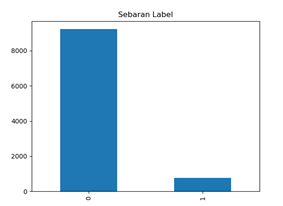
```
Class 0: 9225
Class 1: 775
Proportion: 11.9 : 1

0    9225
1     775
Name: TARGET, dtype: int64
```


terlihat bahwa data memiliki sifat imbalance data,  dimana jumlah data berlabel 0 lebih banyak dibandingkan dengan yang berlabel 1. Jumlah data berlabel 0 adalah 9225 dan berlabel 1 adalah 775, dengan proporsi kedua label adalah 11.9 : 1, dapat disimpulkan data bersifat imbalance data berdasarkan penjelasan dihalaman 14 mengenai imbalance data

### Program k-NN

Menentukan nilai *k* dengan pendekatan perulangan klasifikasi dengan nilai *k=1, 2, ..., 100* dimana 100 kali perulangan terjadi yang ditentukan. Setiap klasifikasi dilakukan bersamaan dengan pencarian nilai *mean error* disetiap pengklasifikasian 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("ex_data.csv")
X = data.drop(['SK_ID_CURR','TARGET'],axis=1)
y = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

error = []
for i in range(1, 100):  
    knn = KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

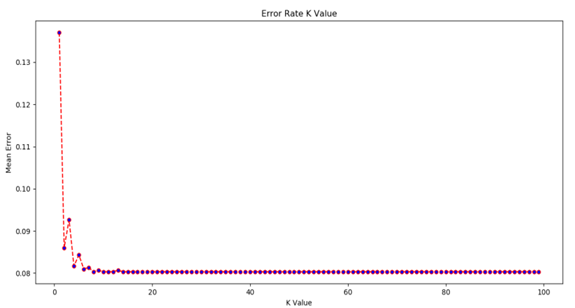

Gambar diatas merupakan hasil iterasi perulangan klasifikasi untuk mencari nilai k yang meminimumkan mean eror, berdasarkan Gambar 3.2diatas, nilal k = 14 memiliki nilai mean eror yang paling mendekati nol dan konsisten sampai dengan k=100. Dengan demikian nilai k = 14 yang terpilih

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

data = pd.read_csv("ex_data.csv")
one = []
zer = []
tf = data['TARGET']

X = data.drop(['SK_ID_CURR','TARGET'],axis=1)
y = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

knn = KNN(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = (np.mean(y_pred != y_test))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
print(classification_report(y_test, y_pred))

```
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       0.00      0.00      0.00       247

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

```

Hasil akurasi klasifikasi k-NN dengan nilai k =14 pada data training dapat terlihat bahwa data test yang di taraining diklasifikasi dengan data tarining, tidak dapat digunakan memprediksi kelas data imbalance karena nilai recall  untuk label 1 adalah 0% yang artinya semua data yang seharusnya berlabel 1 salah diklasifikasikan. Walaupun nilai accuracy sebesar 92%. 

### Program SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

data = pd.read_csv("ex_data.csv")
one = []
zer = []
tf = data['TARGET']

X = data.drop(['SK_ID_CURR','TARGET'],axis=1)
y = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

mSVM = svm.SVC(kernel='rbf', gamma=0.01, C=1)
mSVM.fit(X_train, y_train)
y_pred = mSVM.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
print(classification_report(y_test, y_pred))
mSVM.fit

```
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       0.00      0.00      0.00       247

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000


<bound method BaseLibSVM.fit of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

```

Klasifikasi SVM dengan fungsi kernel Gaussian RBF menggunakan gamma=0.01dengan nilai parameter C = 1. Hasil akurasi klasifikasi kernel Gaussian RBF pada data training dapat dilihat pada output diatas. Terlihat bahwa model yang dibentuk dari data training dapat digunakan untuk memprediksi kelas data test dengan akurasi sebesar 92%, tetapi dari nilai data berlabel 1 adalah 0% yang artinya semua data yang seharusnya berlabel 1 salah diklasifikasikan. Jadi model belum bisa menangani data yang imbalance

### Program Bootstrap SMOTE klasifikasi k-NN dan SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
import statistics as st
import math
import time

data = pd.read_csv("ex_data.csv")

def Bootstrap(data):
    one = []
    tf = data['TARGET']
    ab = data.TARGET.value_counts()
    nab = ab[0]-ab[1]
    n = len(data)
    for j in range(0,n):
        if tf.values[j] == 1:
            one.append(j)
    ic = []
    for i in range(0,nab):
        A = np.random.choice(one, (1), replace=True)
        ic.append(A[0])
    dataA = data.append(data.iloc[ic])
    X = dataA.drop(['SK_ID_CURR','TARGET'],axis=1)
    y = dataA['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    return X_train, X_test, y_train, y_test

def SMOTE_1(data):
    X = data.drop(['SK_ID_CURR','TARGET'],axis=1)
    y = data['TARGET']
    smote = SMOTE(ratio='minority')
    X_sm, y_sm = smote.fit_sample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=2)
    return X_train, X_test, y_train, y_test

#print(classification_report(y_test, y_pred))

def MSVM(X,y,X_test):
    mSVM = svm.SVC(kernel='rbf')
    mSVM.fit(X, y)
    y_pred = mSVM.predict(X_test)
    return y_pred

def mKNN(X,y,X_test):
    cls = KNN(n_neighbors=15)  
    cls.fit(X, y)  
    y_pred = cls.predict(X_test)
    return y_pred



# Bostrap Looping
svm_t_b = np.float64(np.random.choice([0], (100,5), replace=True))
knn_t_b = np.float64(np.random.choice([0], (100,5), replace=True))

    #KNN
start_BK_0 = time.ctime()
for k in range(0,100):
    start_BK_1 = time.ctime()
    X_train, X_test, y_train, y_test = Bootstrap(data)
    y_pred_knn = mKNN(X_train,y_train,X_test)
    mat_knn = confusion_matrix(y_test, y_pred_knn)

    knn_t_b[k][0] = mat_knn[0][0]/(mat_knn[1][0]+mat_knn[0][0])
    knn_t_b[k][1] = mat_knn[1][1]/(mat_knn[1][1]+mat_knn[0][1])
    knn_t_b[k][2] = mat_knn[0][0]/(mat_knn[0][1]+mat_knn[0][0])
    knn_t_b[k][3] = mat_knn[1][1]/(mat_knn[1][1]+mat_knn[1][0])
    knn_t_b[k][4] = (mat_knn[0][0]+mat_knn[1][1])/mat_knn.sum()
    ftime_BK_1 = time.ctime()    
ftime_BK_0 = time.ctime()

    #SVM
start_BS_0 = time.ctime()
for k in range(0,100):
    start_BS_1 = time.ctime()
    X_train, X_test, y_train, y_test = Bootstrap(data)
    y_pred_svm = MSVM(X_train,y_train,X_test)
    mat_svm = confusion_matrix(y_test, y_pred_svm)

    svm_t_b[k][0] = mat_svm[0][0]/(mat_svm[1][0]+mat_svm[0][0])
    svm_t_b[k][1] = mat_svm[1][1]/(mat_svm[1][1]+mat_svm[0][1])
    svm_t_b[k][2] = mat_svm[0][0]/(mat_svm[0][1]+mat_svm[0][0])
    svm_t_b[k][3] = mat_svm[1][1]/(mat_svm[1][1]+mat_svm[1][0])
    svm_t_b[k][4] = (mat_svm[0][0]+mat_svm[1][1])/mat_svm.sum()
    ftime_BS_1 = time.ctime()
ftime_BS_0 = time.ctime()

svm_ta_bs = pd.DataFrame(svm_t_b,columns=('prec_0','prec_1','rec_0','rec_1','accur'))
knn_ta_bs = pd.DataFrame(knn_t_b,columns=('prec_0','prec_1','rec_0','rec_1','accur'))


# SMOTE Looping
svm_t = np.float64(np.random.choice([0], (100,5), replace=True))
knn_t = np.float64(np.random.choice([0], (100,5), replace=True))

    #KNN
start_SK_0 = time.ctime()
for k in range(0,100):
    start_SK_1 = time.ctime()
    X_train, X_test, y_train, y_test = SMOTE_1(data)
    y_pred_knn_s = mKNN(X_train,y_train,X_test)
    mat_knn = confusion_matrix(y_test, y_pred_knn_s)

    knn_t[k][0] = mat_knn[0][0]/(mat_knn[1][0]+mat_knn[0][0])
    knn_t[k][1] = mat_knn[1][1]/(mat_knn[1][1]+mat_knn[0][1])
    knn_t[k][2] = mat_knn[0][0]/(mat_knn[0][1]+mat_knn[0][0])
    knn_t[k][3] = mat_knn[1][1]/(mat_knn[1][1]+mat_knn[1][0])
    knn_t[k][4] = (mat_knn[0][0]+mat_knn[1][1])/mat_knn.sum()
    ftime_SK_1 = time.ctime()
ftime_SK_0 = time.ctime()    

    #SVM
start_SS_0 = time.ctime()
for k in range(0,100):
    start_SS_1 = time.ctime()
    X_train, X_test, y_train, y_test = SMOTE_1(data)
    y_pred_svm_s = MSVM(X_train,y_train,X_test)
    mat_svm = confusion_matrix(y_test, y_pred_svm_s)

    svm_t[k][0] = mat_svm[0][0]/(mat_svm[1][0]+mat_svm[0][0])
    svm_t[k][1] = mat_svm[1][1]/(mat_svm[1][1]+mat_svm[0][1])
    svm_t[k][2] = mat_svm[0][0]/(mat_svm[0][1]+mat_svm[0][0])
    svm_t[k][3] = mat_svm[1][1]/(mat_svm[1][1]+mat_svm[1][0])
    svm_t[k][4] = (mat_svm[0][0]+mat_svm[1][1])/mat_svm.sum()
    ftime_SS_1 = time.ctime()
ftime_SS_0 = time.ctime()

svm_ta_SM = pd.DataFrame(svm_t,columns=('prec_0','prec_1','rec_0','rec_1','accur'))
knn_ta_SM = pd.DataFrame(knn_t,columns=('prec_0','prec_1','rec_0','rec_1','accur'))



svm_ta_bs_mean = svm_ta_bs.mean()
knn_ta_bs_mean = knn_ta_bs.mean()

svm_ta_SM_mean = svm_ta_SM.mean()
knn_ta_SM_mean = knn_ta_SM.mean()

a=0.05
n=100

lo_prec0 = svm_ta_bs_mean['prec_0']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_bs['prec_0'])/n)
lo_prec1 = svm_ta_bs_mean['prec_1']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_bs['prec_1'])/n)
lo_rec0 = svm_ta_bs_mean['rec_0']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_bs['rec_0'])/n)
lo_rec1 = svm_ta_bs_mean['rec_1']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_bs['rec_1'])/n)
lo_accur = svm_ta_bs_mean['accur']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_bs['accur'])/n)

up_prec0 = svm_ta_bs_mean['prec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_bs['prec_0'])/n)
up_prec1 = svm_ta_bs_mean['prec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_bs['prec_1'])/n)
up_rec0 = svm_ta_bs_mean['rec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_bs['rec_0'])/n)
up_rec1 = svm_ta_bs_mean['rec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_bs['rec_1'])/n)
up_accur = svm_ta_bs_mean['accur']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_bs['accur'])/n)


print('===========================================')
print('Resampling Bootstrap + Klasifikasi SVM')
print(' Keterangan :',' Batas Bawah ',' Batas Atas ')
print(' Pecision 0 : [','{:.5f}'.format(lo_prec0),',','{:.5f}'.format(up_prec0),']')
print(' Pecision 1 : [','{:.5f}'.format(lo_prec1),',','{:.5f}'.format(up_prec1),']')                                                          
print(' recall 0   : [','{:.5f}'.format(lo_rec0),',','{:.5f}'.format(up_rec0),']')
print(' recall 1   : [','{:.5f}'.format(lo_rec1),',','{:.5f}'.format(up_rec1),']')                                                          
print(' Accuracy   : [','{:.5f}'.format(lo_accur),',','{:.5f}'.format(up_accur),']')
print('===========================================')
print(classification_report(y_test, y_pred_svm))

lo_prec0 = knn_ta_bs_mean['prec_0']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_bs['prec_0'])/n)
lo_prec1 = knn_ta_bs_mean['prec_1']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_bs['prec_1'])/n)
lo_rec0 = knn_ta_bs_mean['rec_0']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_bs['rec_0'])/n)
lo_rec1 = knn_ta_bs_mean['rec_1']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_bs['rec_1'])/n)
lo_accur = knn_ta_bs_mean['accur']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_bs['accur'])/n)

up_prec0 = knn_ta_bs_mean['prec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_bs['prec_0'])/n)
up_prec1 = knn_ta_bs_mean['prec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_bs['prec_1'])/n)
up_rec0 = knn_ta_bs_mean['rec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_bs['rec_0'])/n)
up_rec1 = knn_ta_bs_mean['rec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_bs['rec_1'])/n)
up_accur = knn_ta_bs_mean['accur']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_bs['accur'])/n)

print('===========================================')
print('Resampling Bootstrap + Klasifikasi K-NN')
print(' Keterangan :',' Batas Bawah ',' Batas Atas ')
print(' Pecision 0 : [','{:.5f}'.format(lo_prec0),',','{:.5f}'.format(up_prec0),']')
print(' Pecision 1 : [','{:.5f}'.format(lo_prec1),',','{:.5f}'.format(up_prec1),']')                                                          
print(' recall 0   : [','{:.5f}'.format(lo_rec0),',','{:.5f}'.format(up_rec0),']')
print(' recall 1   : [','{:.5f}'.format(lo_rec1),',','{:.5f}'.format(up_rec1),']')                                                          
print(' Accuracy   : [','{:.5f}'.format(lo_accur),',','{:.5f}'.format(up_accur),']')
print('===========================================')
print(classification_report(y_test, y_pred_knn))

lo_prec0 = svm_ta_SM_mean['prec_0']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_SM['prec_0'])/n)
lo_prec1 = svm_ta_SM_mean['prec_1']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_SM['prec_1'])/n)
lo_rec0 = svm_ta_SM_mean['rec_0']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_SM['rec_0'])/n)
lo_rec1 = svm_ta_SM_mean['rec_1']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_SM['rec_1'])/n)
lo_accur = svm_ta_SM_mean['accur']+norm.ppf(a/2)*math.sqrt(st.variance(svm_ta_SM['accur'])/n)

up_prec0 = svm_ta_SM_mean['prec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_SM['prec_0'])/n)
up_prec1 = svm_ta_SM_mean['prec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_SM['prec_1'])/n)
up_rec0 = svm_ta_SM_mean['rec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_SM['rec_0'])/n)
up_rec1 = svm_ta_SM_mean['rec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_SM['rec_1'])/n)
up_accur = svm_ta_SM_mean['accur']+norm.ppf(1-(a/2))*math.sqrt(st.variance(svm_ta_SM['accur'])/n)


print('===========================================')
print('Resampling Bootstrap SMOTE + Klasifikasi SVM')
print(' Keterangan :',' Batas Bawah ',' Batas Atas ')
print(' Pecision 0 : [','{:.5f}'.format(lo_prec0),',','{:.5f}'.format(up_prec0),']')
print(' Pecision 1 : [','{:.5f}'.format(lo_prec1),',','{:.5f}'.format(up_prec1),']')                                                          
print(' recall 0   : [','{:.5f}'.format(lo_rec0),',','{:.5f}'.format(up_rec0),']')
print(' recall 1   : [','{:.5f}'.format(lo_rec1),',','{:.5f}'.format(up_rec1),']')                                                          
print(' Accuracy   : [','{:.5f}'.format(lo_accur),',','{:.5f}'.format(up_accur),']')
print('===========================================')
print(classification_report(y_test, y_pred_svm_s))


lo_prec0 = knn_ta_SM_mean['prec_0']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_SM['prec_0'])/n)
lo_prec1 = knn_ta_SM_mean['prec_1']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_SM['prec_1'])/n)
lo_rec0 = knn_ta_SM_mean['rec_0']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_SM['rec_0'])/n)
lo_rec1 = knn_ta_SM_mean['rec_1']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_SM['rec_1'])/n)
lo_accur = knn_ta_SM_mean['accur']+norm.ppf(a/2)*math.sqrt(st.variance(knn_ta_SM['accur'])/n)

up_prec0 = knn_ta_SM_mean['prec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_SM['prec_0'])/n)
up_prec1 = knn_ta_SM_mean['prec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_SM['prec_1'])/n)
up_rec0 = knn_ta_SM_mean['rec_0']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_SM['rec_0'])/n)
up_rec1 = knn_ta_SM_mean['rec_1']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_SM['rec_1'])/n)
up_accur = knn_ta_SM_mean['accur']+norm.ppf(1-(a/2))*math.sqrt(st.variance(knn_ta_SM['accur'])/n)

print('===========================================')
print('Resampling Bootstrap SMOTE + Klasifikasi K-NN')
print(' Keterangan :',' Batas Bawah ',' Batas Atas ')
print(' Pecision 0 : [','{:.5f}'.format(lo_prec0),',','{:.5f}'.format(up_prec0),']')
print(' Pecision 1 : [','{:.5f}'.format(lo_prec1),',','{:.5f}'.format(up_prec1),']')                                                          
print(' recall 0   : [','{:.5f}'.format(lo_rec0),',','{:.5f}'.format(up_rec0),']')
print(' recall 1   : [','{:.5f}'.format(lo_rec1),',','{:.5f}'.format(up_rec1),']')                                                          
print(' Accuracy   : [','{:.5f}'.format(lo_accur),',','{:.5f}'.format(up_accur),']')
print('===========================================')
print(classification_report(y_test, y_pred_knn_s))



print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(' Waktu Berjalannya Proses pemograman')
print(' Keterangan		: [One Looping]      [Multi Looping]')
print(' Keterangan		: [Mulai , Selesai]  [Mulai , Selesai]')
print(' Bootstrap + KNN 	: [',start_BK_1,',',ftime_BK_1,'] [',start_BK_0,',',ftime_BK_0,']')
print(' Bootstrap + SVM 	: [',start_BS_1,',',ftime_BS_1,'] [',start_BS_0,',',ftime_BS_0,']')                                                          
print(' Bootstrap SMOTE + KNN   : [',start_SK_1,',',ftime_SK_1,'] [',start_SK_0,',',ftime_SK_0,']')
print(' Bootstrap SMOTE + SVM   : [',start_SS_1,',',ftime_SS_1,'] [',start_SS_0,',',ftime_SS_0,']')                                                          
print('=============================================================================================')

```
===========================================
Resampling Bootstrap + Klasifikasi SVM
 Keterangan :  Batas Bawah   Batas Atas 
 Pecision 0 : [ 0.99975 , 0.99994 ]
 Pecision 1 : [ 1.00000 , 1.00000 ]
 recall 0   : [ 1.00000 , 1.00000 ]
 recall 1   : [ 0.99976 , 0.99994 ]
 Accuracy   : [ 0.99988 , 0.99997 ]
===========================================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2733
           1       1.00      1.00      1.00      2802

    accuracy                           1.00      5535
   macro avg       1.00      1.00      1.00      5535
weighted avg       1.00      1.00      1.00      5535

===========================================
Resampling Bootstrap + Klasifikasi K-NN
 Keterangan :  Batas Bawah   Batas Atas 
 Pecision 0 : [ 0.77962 , 0.78379 ]
 Pecision 1 : [ 0.66451 , 0.66588 ]
 recall 0   : [ 0.56149 , 0.56492 ]
 recall 1   : [ 0.84427 , 0.84852 ]
 Accuracy   : [ 0.70570 , 0.70744 ]
===========================================
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      2733
           1       0.66      0.84      0.74      2802

    accuracy                           0.71      5535
   macro avg       0.72      0.70      0.70      5535
weighted avg       0.72      0.71      0.70      5535

===========================================
Resampling Bootstrap SMOTE + Klasifikasi SVM
 Keterangan :  Batas Bawah   Batas Atas 
 Pecision 0 : [ 0.49572 , 0.49589 ]
 Pecision 1 : [ 1.00000 , 1.00000 ]
 recall 0   : [ 1.00000 , 1.00000 ]
 recall 1   : [ 0.00780 , 0.00844 ]
 Accuracy   : [ 0.49772 , 0.49804 ]
===========================================
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2733
           1       1.00      0.01      0.02      2802

    accuracy                           0.50      5535
   macro avg       0.75      0.50      0.34      5535
weighted avg       0.75      0.50      0.34      5535

===========================================
Resampling Bootstrap SMOTE + Klasifikasi K-NN
 Keterangan :  Batas Bawah   Batas Atas 
 Pecision 0 : [ 0.82862 , 0.83206 ]
 Pecision 1 : [ 0.69372 , 0.69517 ]
 recall 0   : [ 0.60183 , 0.60444 ]
 recall 1   : [ 0.87822 , 0.88122 ]
 Accuracy   : [ 0.74226 , 0.74404 ]
===========================================
              precision    recall  f1-score   support

           0       0.82      0.60      0.69      2733
           1       0.69      0.87      0.77      2802

    accuracy                           0.73      5535
   macro avg       0.75      0.73      0.73      5535
weighted avg       0.75      0.73      0.73      5535

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Waktu Berjalannya Proses pemograman
 Keterangan		: [One Looping]      [Multi Looping]
 Keterangan		: [Mulai , Selesai]  [Mulai , Selesai]
 Bootstrap + KNN 	: [ Mon Apr 13 00:24:17 2020 , Mon Apr 13 00:24:20 2020 ] [ Mon Apr 13 00:20:26 2020 , Mon Apr 13 00:24:20 2020 ]
 Bootstrap + SVM 	: [ Mon Apr 13 06:51:26 2020 , Mon Apr 13 06:53:20 2020 ] [ Mon Apr 13 00:24:20 2020 , Mon Apr 13 06:53:20 2020 ]
 Bootstrap SMOTE + KNN   : [ Mon Apr 13 06:55:53 2020 , Mon Apr 13 06:55:54 2020 ] [ Mon Apr 13 06:53:20 2020 , Mon Apr 13 06:55:54 2020 ]
 Bootstrap SMOTE + SVM   : [ Mon Apr 13 09:28:48 2020 , Mon Apr 13 09:30:25 2020 ] [ Mon Apr 13 06:55:54 2020 , Mon Apr 13 09:30:25 2020 ]
=============================================================================================

```

Dilihat pada output diatas nilai batas bawah (BB) dan batas atas (BA) adalah estimasi interval nilai Precision, recall, dan Accuracy yang didapat pada setiap kombinasi metode. Dengan contoh penjelasan pada salah satu kombinasi metode, pada Metode klasifikasi SVM + Bootstrap untuk klasifikasi label 0 memiliki interval nilai Precision sebesar [0.99975, .99994] artinya dari 2733 data, antar 99.9975% s/d 99.9994% data yang diklasifikasikan sebagi label 0 benar berlabel 0, dan sisanya salah. Untuk nilai Recall berasal dari perbandingan banyaknya data yang diklasifikasinya sebagai label 0 dan benar berlabel 0 dengan banyaknya data yang sebenarnya berlabel 0, dengan didapatkan nilai itervealnya [1.0000,1.0000] artinya 100% dari jumlah data yang sebenarnya berlabel 0 sudah terklasifikasikan benar . Dari nilai interval tersebut dapat disimpulkan bahwa data berlabel 0 sudah semua diklasifikasikan ke label 0. Begitupun untuk data berlabel 1 dengan cara penjelasn yang sama. Nilai Accuracy  dari jumlah data yang benar diklasifikasikan label 0 dan 1 dibagi dengan jumlah seluruh data dimana hasil intervalnya [0.99988, 0.99997] artinya Accuracy  metode tersebut antara 99.988% s/d 99.997. Dan seterusnya untuk semua metode dengan cara penjelasan yang sama.
Berdasarkan nilai BA dan BB seluruh parameter metode yang baik dalam penanganan data imbalance yaitu menggunakan klasifikasi SVM dengan penyeimbangan data menggunakan Bootstrap tanpa SMOTE.
